In [1]:
%env CUDA_DEVICE_ORDER=PCI_BUS_ID
%env CUDA_VISIBLE_DEVICES=0

env: CUDA_DEVICE_ORDER=PCI_BUS_ID
env: CUDA_VISIBLE_DEVICES=0


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tqdm.autonotebook import tqdm
from joblib import Parallel, delayed
import umap
import pandas as pd

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/tqdm/autonotebook/__init__.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  " (e.g. in jupyter console)", TqdmExperimentalWarning)


In [4]:
from avgn.utils.paths import DATA_DIR, most_recent_subdirectory, ensure_dir
from avgn.signalprocessing.create_spectrogram_dataset import flatten_spectrograms
from avgn.visualization.spectrogram import draw_spec_set
from avgn.visualization.quickplots import draw_projection_plots
from avgn.visualization.projections import scatter_spec, scatter_projections


In [5]:
from avgn.visualization.projections import (
    scatter_projections,
    draw_projection_transitions,
)

### Collect data

In [6]:
DATASET_ID = 'european_starling_gentner_segmented'

### create dataset

In [7]:
from avgn.utils.hparams import HParams
from avgn.dataset import DataSet

In [8]:
# create a dataset object
dataset = DataSet(DATASET_ID, hparams = HParams())

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 24 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.1s


[Parallel(n_jobs=-1)]: Done 3805 out of 3805 | elapsed:    6.0s finished


### load syllable df

In [9]:
df_loc =  DATA_DIR / 'syllable_dfs' / DATASET_ID / 'starling.pickle'
df_loc

PosixPath('/local/home/tsainbur/github_repos/avgn_paper/data/syllable_dfs/european_starling_gentner_segmented/starling.pickle')

In [10]:
syllable_df = pd.read_pickle(df_loc)

In [11]:
syllable_df[:3]

,start_time,end_time,indv,indvi,key,rate,spectrogram
0,6.543,7.913,b1076,0,2017-09-01_19-19-15-490000,44100,"[[11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, ..."
1,8.411,9.894,b1076,0,2017-09-01_19-19-15-490000,44100,"[[47, 24, 37, 40, 17, 10, 6, 6, 6, 6, 6, 6, 6,..."
2,10.490,10.678,b1076,0,2017-09-01_19-19-15-490000,44100,"[[0, 0, 0, 0, 103, 115, 118, 103, 132, 147, 16..."


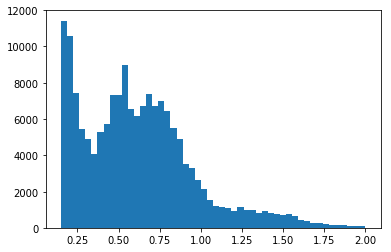

In [12]:
plt.hist(np.array(syllable_df.end_time - syllable_df.start_time), bins=50);

### Cluster

In [13]:
def norm(x):
    return (x - np.min(x)) / (np.max(x) - np.min(x))

In [14]:
from cuml.manifold.umap import UMAP as cumlUMAP
import hdbscan

In [15]:
from avgn.umap import umap_reduce

b1076 25406


Exception ignored in: <bound method UMAP.__del__ of UMAP()>
Traceback (most recent call last):
  File "cuml/manifold/umap.pyx", line 313, in cuml.manifold.umap.UMAP.__del__
AttributeError: 'UMAP' object has no attribute 'umap_params'
/local/home/tsainbur/github_repos/avgn_paper/avgn/umap.py:11: UserWarning: Exception occured! file=/conda/conda-bld/libcuml_1566588242169/work/cpp/src/common/cumlHandle.cpp line=177: FAIL: call='cudaGetDevice(&cur_dev)'. Reason:no CUDA-capable device is detected

Obtained 64 stack frames
#0 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9Exception16collectCallStackEv+0x3e) [0x7fbf0c06556e]
#1 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9ExceptionC2ERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE+0x80) [0x7fbf0c066080]
#2 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../lib

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/numba/object_mode_passes.py:178: NumbaWarning: Function "make_euclidean_tree" was compiled in object mode without forceobj=True.

File "../../../../../../../mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/umap/rp_tree.py", line 440:
@numba.jit()
def make_euclidean_tree(data, indices, rng_state, leaf_size=30):
^

  state.func_ir.loc))
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/numba/object_mode_passes.py:187: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit http://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "../../../../../../../mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/umap/rp_tree.py", line 440:
@numba.jit()
def make_euclidean_tree(data, indices, rng_sta

b1060 65871


Exception ignored in: <bound method UMAP.__del__ of UMAP()>
Traceback (most recent call last):
  File "cuml/manifold/umap.pyx", line 313, in cuml.manifold.umap.UMAP.__del__
AttributeError: 'UMAP' object has no attribute 'umap_params'
/local/home/tsainbur/github_repos/avgn_paper/avgn/umap.py:11: UserWarning: Exception occured! file=/conda/conda-bld/libcuml_1566588242169/work/cpp/src/common/cumlHandle.cpp line=177: FAIL: call='cudaGetDevice(&cur_dev)'. Reason:no CUDA-capable device is detected

Obtained 64 stack frames
#0 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9Exception16collectCallStackEv+0x3e) [0x7fbf0c06556e]
#1 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9ExceptionC2ERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE+0x80) [0x7fbf0c066080]
#2 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../lib

b1125 2702


Exception ignored in: <bound method UMAP.__del__ of UMAP()>
Traceback (most recent call last):
  File "cuml/manifold/umap.pyx", line 313, in cuml.manifold.umap.UMAP.__del__
AttributeError: 'UMAP' object has no attribute 'umap_params'
/local/home/tsainbur/github_repos/avgn_paper/avgn/umap.py:11: UserWarning: Exception occured! file=/conda/conda-bld/libcuml_1566588242169/work/cpp/src/common/cumlHandle.cpp line=177: FAIL: call='cudaGetDevice(&cur_dev)'. Reason:no CUDA-capable device is detected

Obtained 64 stack frames
#0 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9Exception16collectCallStackEv+0x3e) [0x7fbf0c06556e]
#1 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9ExceptionC2ERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE+0x80) [0x7fbf0c066080]
#2 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../lib

b1077 18570


Exception ignored in: <bound method UMAP.__del__ of UMAP()>
Traceback (most recent call last):
  File "cuml/manifold/umap.pyx", line 313, in cuml.manifold.umap.UMAP.__del__
AttributeError: 'UMAP' object has no attribute 'umap_params'
/local/home/tsainbur/github_repos/avgn_paper/avgn/umap.py:11: UserWarning: Exception occured! file=/conda/conda-bld/libcuml_1566588242169/work/cpp/src/common/cumlHandle.cpp line=177: FAIL: call='cudaGetDevice(&cur_dev)'. Reason:no CUDA-capable device is detected

Obtained 64 stack frames
#0 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9Exception16collectCallStackEv+0x3e) [0x7fbf0c06556e]
#1 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9ExceptionC2ERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE+0x80) [0x7fbf0c066080]
#2 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../lib

b1066 22259


Exception ignored in: <bound method UMAP.__del__ of UMAP()>
Traceback (most recent call last):
  File "cuml/manifold/umap.pyx", line 313, in cuml.manifold.umap.UMAP.__del__
AttributeError: 'UMAP' object has no attribute 'umap_params'
/local/home/tsainbur/github_repos/avgn_paper/avgn/umap.py:11: UserWarning: Exception occured! file=/conda/conda-bld/libcuml_1566588242169/work/cpp/src/common/cumlHandle.cpp line=177: FAIL: call='cudaGetDevice(&cur_dev)'. Reason:no CUDA-capable device is detected

Obtained 64 stack frames
#0 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9Exception16collectCallStackEv+0x3e) [0x7fbf0c06556e]
#1 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9ExceptionC2ERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE+0x80) [0x7fbf0c066080]
#2 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../lib

b1053 24110


Exception ignored in: <bound method UMAP.__del__ of UMAP()>
Traceback (most recent call last):
  File "cuml/manifold/umap.pyx", line 313, in cuml.manifold.umap.UMAP.__del__
AttributeError: 'UMAP' object has no attribute 'umap_params'
/local/home/tsainbur/github_repos/avgn_paper/avgn/umap.py:11: UserWarning: Exception occured! file=/conda/conda-bld/libcuml_1566588242169/work/cpp/src/common/cumlHandle.cpp line=177: FAIL: call='cudaGetDevice(&cur_dev)'. Reason:no CUDA-capable device is detected

Obtained 64 stack frames
#0 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9Exception16collectCallStackEv+0x3e) [0x7fbf0c06556e]
#1 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9ExceptionC2ERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE+0x80) [0x7fbf0c066080]
#2 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../lib

b1143 5316


Exception ignored in: <bound method UMAP.__del__ of UMAP()>
Traceback (most recent call last):
  File "cuml/manifold/umap.pyx", line 313, in cuml.manifold.umap.UMAP.__del__
AttributeError: 'UMAP' object has no attribute 'umap_params'
/local/home/tsainbur/github_repos/avgn_paper/avgn/umap.py:11: UserWarning: Exception occured! file=/conda/conda-bld/libcuml_1566588242169/work/cpp/src/common/cumlHandle.cpp line=177: FAIL: call='cudaGetDevice(&cur_dev)'. Reason:no CUDA-capable device is detected

Obtained 64 stack frames
#0 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9Exception16collectCallStackEv+0x3e) [0x7fbf0c06556e]
#1 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../libcuml++.so(_ZN8MLCommon9ExceptionC2ERKNSt7__cxx1112basic_stringIcSt11char_traitsIcESaIcEEE+0x80) [0x7fbf0c066080]
#2 in /mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/cuml/common/../../../../lib

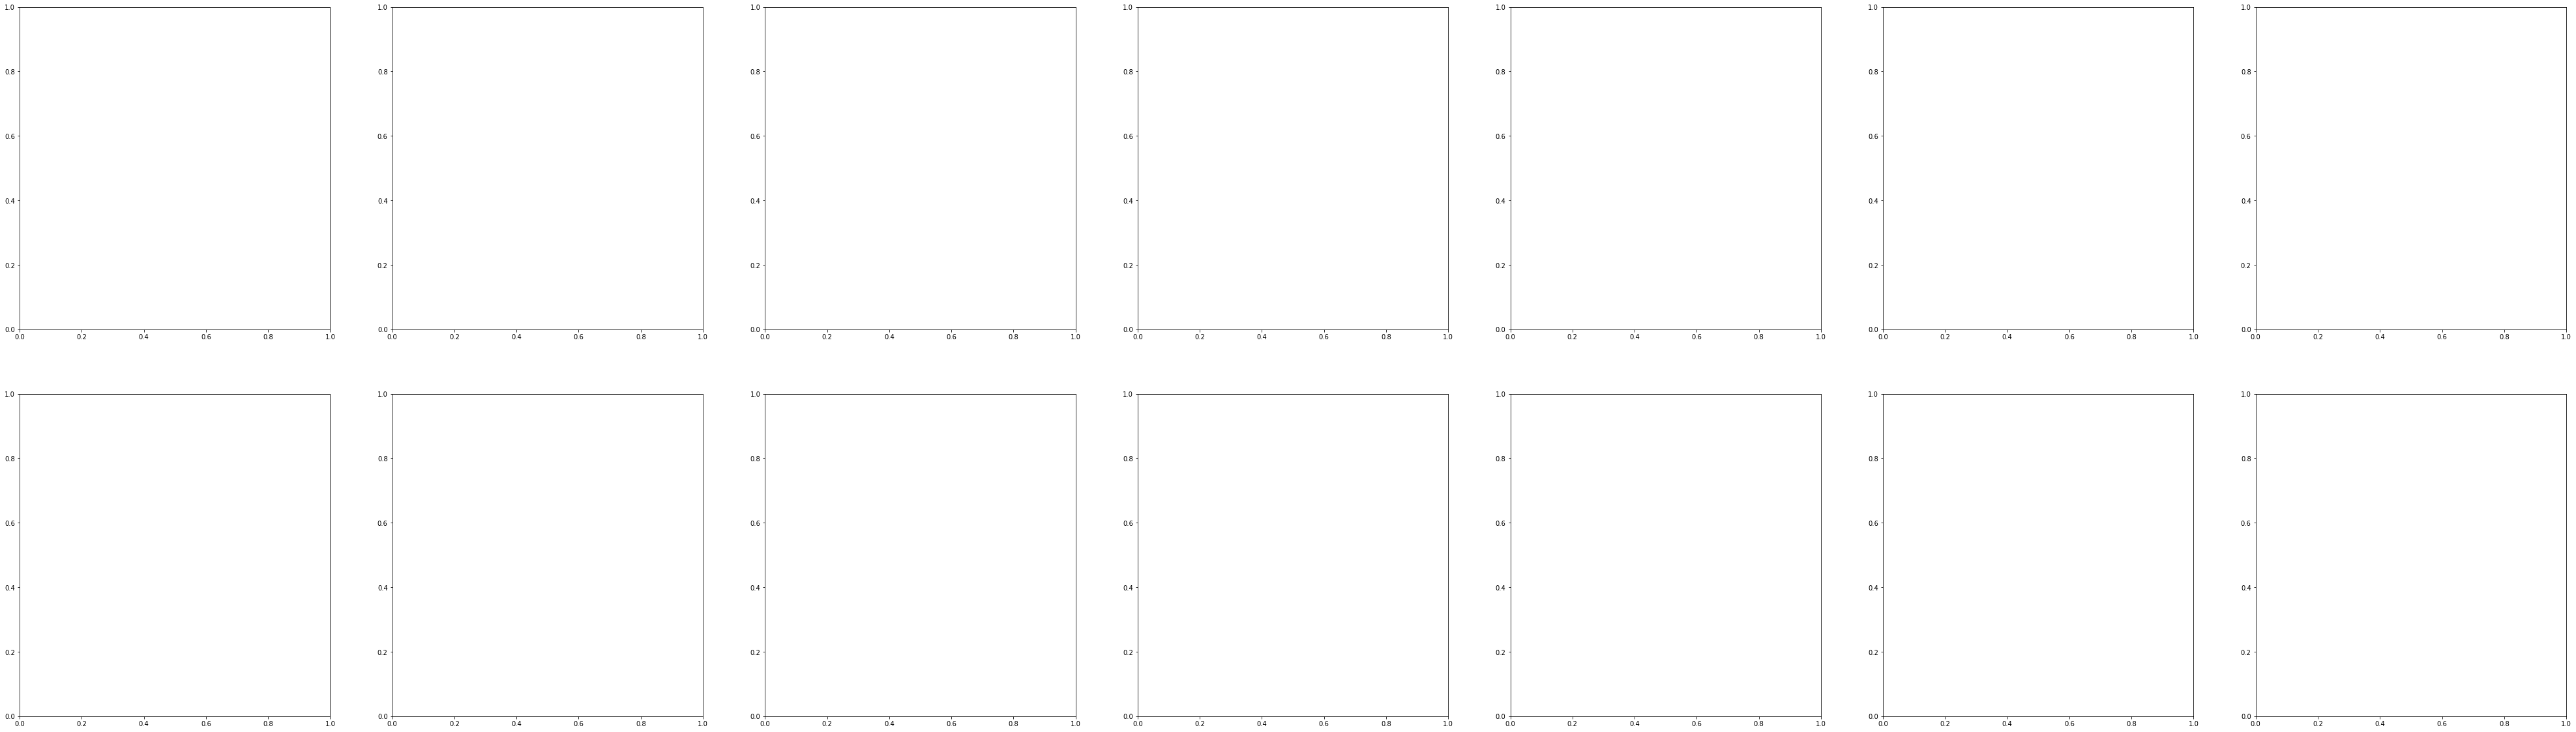

In [16]:

indv_dfs = {}
for indvi, indv in enumerate(tqdm(syllable_df.indv.unique())):
    #if indv != 'Bird5': continue
    indv_dfs[indv] = syllable_df[syllable_df.indv == indv]
    indv_dfs[indv] = indv_dfs[indv].sort_values(by=["key", "start_time"])
    print(indv, len(indv_dfs[indv]))
    specs = [norm(i) for i in indv_dfs[indv].spectrogram.values]
    
    # sequencing
    indv_dfs[indv]["syllables_sequence_id"] = None
    indv_dfs[indv]["syllables_sequence_pos"] = None
    for ki, key in enumerate(indv_dfs[indv].key.unique()):
        indv_dfs[indv].loc[indv_dfs[indv].key == key, "syllables_sequence_id"] = ki
        indv_dfs[indv].loc[indv_dfs[indv].key == key, "syllables_sequence_pos"] = np.arange(
            np.sum(indv_dfs[indv].key == key)
        )
        
    # umap
    specs_flattened = flatten_spectrograms(specs)
    #cuml_umap = cumlUMAP(min_dist=0.5)
    #z = list(cuml_umap.fit_transform(specs_flattened))
    z, _ = umap_reduce(specs_flattened, min_dist = 0.35)
    indv_dfs[indv]["umap"] = list(z)
    
    # HDBSCAN UMAP
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=int(len(z) * 0.001), # the smallest size we would expect a cluster to be
        min_samples=1, # larger values = more conservative clustering
    )
    clusterer.fit(z);
    indv_dfs[indv]['hdbscan_labels'] = clusterer.labels_
    # plot
    fig, axs, main_ax = scatter_spec(
        np.vstack(indv_dfs[indv].umap.values),
        indv_dfs[indv].spectrogram.values,
        column_size=15,
        pal_color="hls",
        color_points=False,
        enlarge_points=20,
        figsize=(10, 10),
        scatter_kwargs = {
            'labels': list(indv_dfs[indv].hdbscan_labels.values),
            'alpha':0.25,
            's': 1,
            'show_legend': False
        },
        matshow_kwargs = {
            'cmap': plt.cm.Greys
        },
        line_kwargs = {
            'lw':1,
            'ls':"solid",
            'alpha':0.25,
        },
        draw_lines=True,
        #show_scatter=False,
    );
    

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


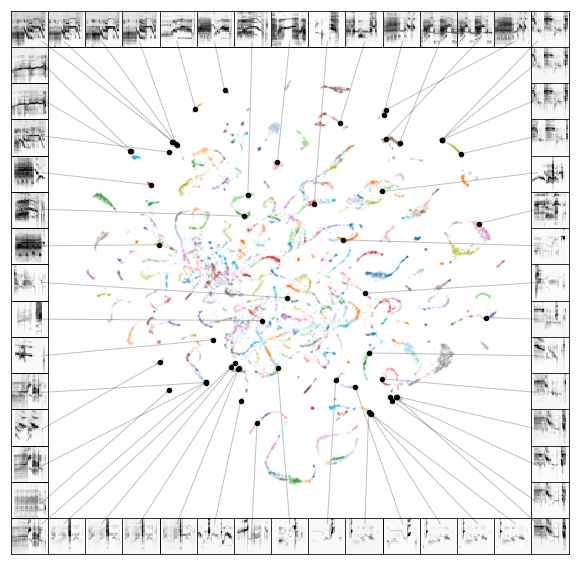

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


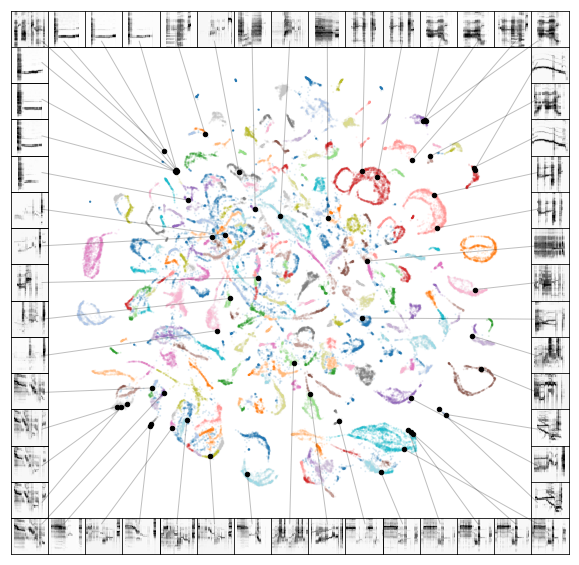

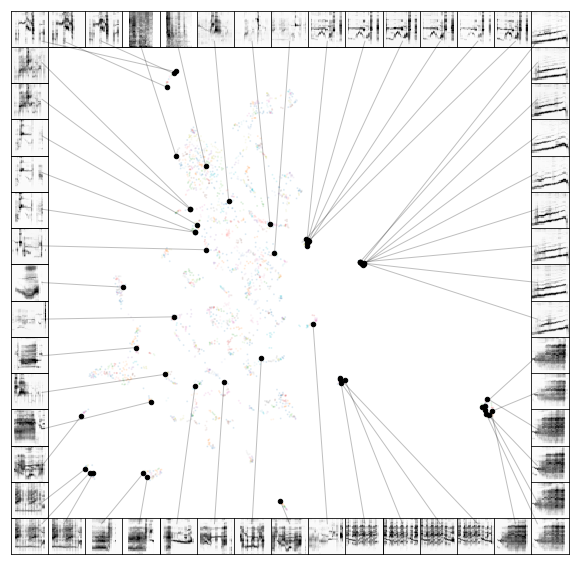

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


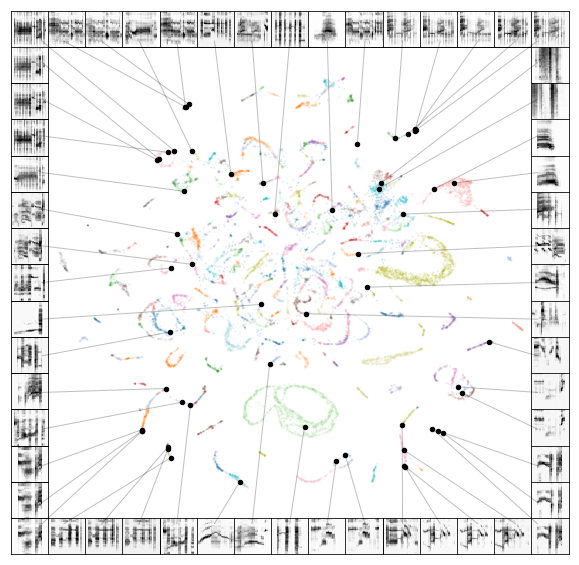

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


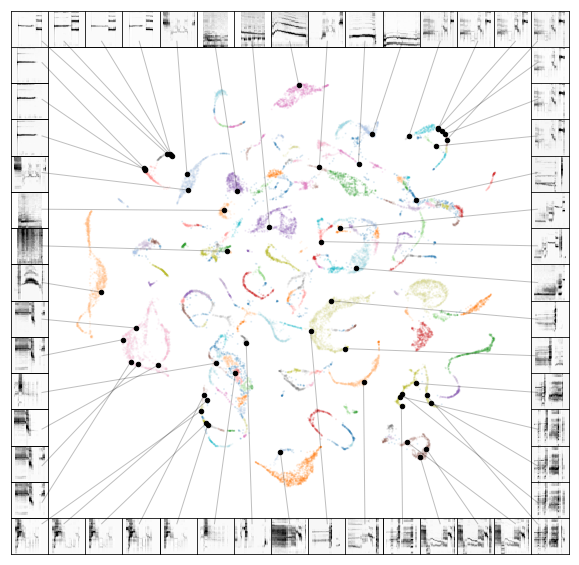

/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)
/mnt/cube/tsainbur/conda_envs/tpy3/lib/python3.6/site-packages/sklearn/externals/joblib/parallel.py:268: DeprecationWarning: check_pickle is deprecated in joblib 0.12 and will be removed in 0.13
  ' removed in 0.13', DeprecationWarning)


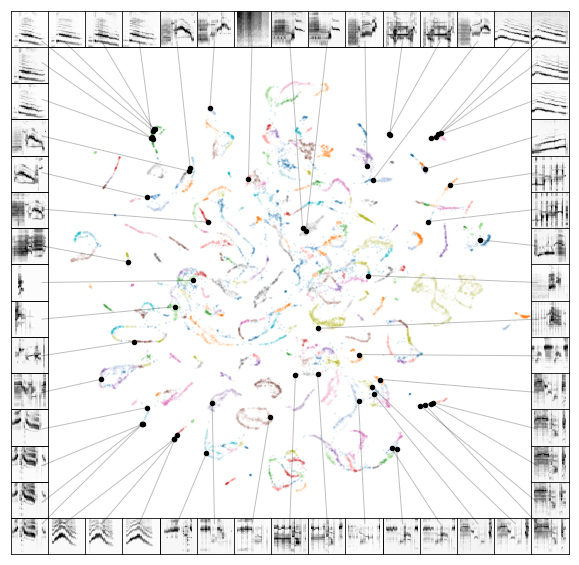

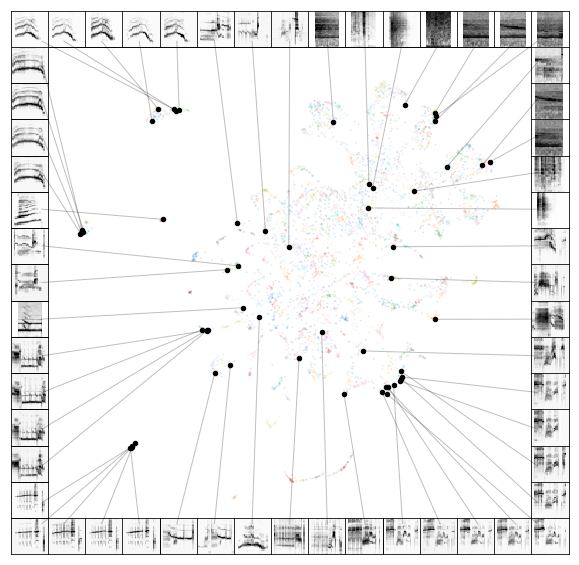

In [33]:
for indvi, indv in enumerate(tqdm(syllable_df.indv.unique())):
    z = np.vstack(indv_dfs[indv].umap.values)
    # HDBSCAN UMAP
    clusterer = hdbscan.HDBSCAN(
        min_cluster_size=int(len(z) * 0.001), # the smallest size we would expect a cluster to be
        min_samples=1, # larger values = more conservative clustering
    )
    clusterer.fit(z);
    indv_dfs[indv]['hdbscan_labels'] = clusterer.labels_
    
    fig, axs, main_ax = scatter_spec(
        z,
        indv_dfs[indv].spectrogram.values,
        column_size=15,
        pal_color="hls",
        color_points=False,
        enlarge_points=20,
        figsize=(10, 10),
        scatter_kwargs = {
            'labels': list(indv_dfs[indv].hdbscan_labels.values),
            'alpha':0.1,
            's': 1,
            'show_legend': False
        },
        matshow_kwargs = {
            'cmap': plt.cm.Greys
        },
        line_kwargs = {
            'lw':1,
            'ls':"solid",
            'alpha':0.25,
        },
        draw_lines=True,
        #show_scatter=False,
    );
    plt.show()

In [34]:
save_loc = DATA_DIR / 'indv_dfs' / DATASET_ID
ensure_dir(save_loc)

In [35]:
for indv in tqdm(indv_dfs.keys()):
    indv_dfs[indv].to_pickle(save_loc / (indv + '.pickle'))